1. Gerekli kütüphaneler

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2. Veriyi okuma

In [9]:
import pandas as pd
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import r2_score

train_df = pd.read_csv("datasets/processed_train_data.csv")
test_df = pd.read_csv("datasets/processed_test_data.csv")

target = "Thyroid_Cancer_Risk"

features = ['Age', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
            'Smoking', 'Obesity', 'Diabetes']

best_r2 = -float("inf")
best_feature = None

for feature in features:
    X_train = train_df[feature]
    y_train = train_df["Thyroid_Cancer_Risk"]
    X_test = test_df[feature]
    y_test = test_df["Thyroid_Cancer_Risk"]

    model = IsotonicRegression(out_of_bounds='clip')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    print(f"{feature} → R²: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_feature = feature

print(f"\n🔍 En iyi özellik: {best_feature} (R²: {best_r2:.4f})")

Age → R²: 0.0000
Family_History → R²: 0.0583
Radiation_Exposure → R²: 0.0204
Iodine_Deficiency → R²: 0.0308
Smoking → R²: -0.0000
Obesity → R²: -0.0000
Diabetes → R²: -0.0000

🔍 En iyi özellik: Family_History (R²: 0.0583)


In [10]:
# En iyi öznitelik: Family_History
X_train = train_df["Family_History"]
y_train = train_df["Thyroid_Cancer_Risk"]

X_test = test_df["Family_History"]
y_test = test_df["Thyroid_Cancer_Risk"]

3. Model eğitimi

In [11]:
iso_model = IsotonicRegression(out_of_bounds='clip')
iso_model.fit(X_train, y_train)
y_pred = iso_model.predict(X_test)

4. Performans metrikleri

In [12]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Skoru: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R² Skoru: 0.0583
MSE: 0.5001
MAE: 0.6304


6. Tahmin - Gerçek grafiği

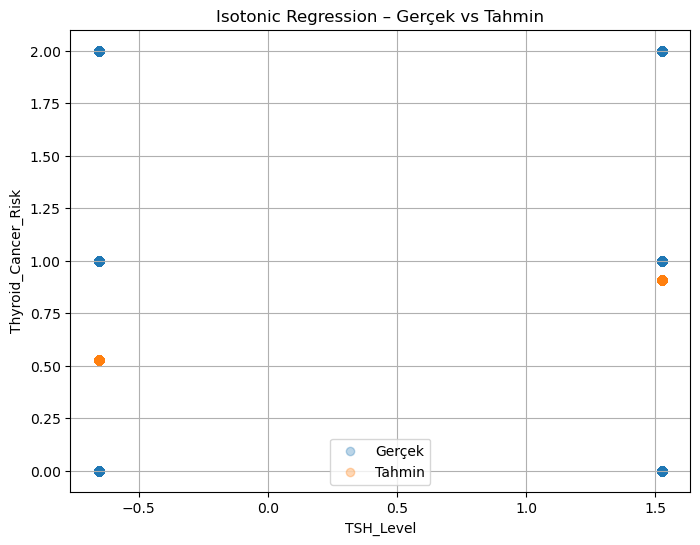

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, alpha=0.3, label="Gerçek")
plt.scatter(X_test, y_pred, alpha=0.3, label="Tahmin")
plt.xlabel("TSH_Level")
plt.ylabel("Thyroid_Cancer_Risk")
plt.title("Isotonic Regression – Gerçek vs Tahmin")
plt.legend()
plt.grid(True)
plt.show()